# Lie Algebras: Foundations and Computational Examples

## 1. Introduction

**Lie algebras** are fundamental algebraic structures that arise naturally in the study of continuous symmetries in mathematics and physics. Named after the Norwegian mathematician Sophus Lie (1842–1899), these structures provide the infinitesimal description of Lie groups and play a central role in differential geometry, quantum mechanics, and particle physics.

### 1.1 Historical Context

Sophus Lie developed the theory of continuous transformation groups in the 1870s while studying differential equations. The key insight was that continuous symmetries of differential equations could be captured by studying their infinitesimal generators, leading to what we now call Lie algebras.

## 2. Mathematical Foundations

### 2.1 Definition of a Lie Algebra

A **Lie algebra** is a vector space $\mathfrak{g}$ over a field $\mathbb{F}$ (typically $\mathbb{R}$ or $\mathbb{C}$) equipped with a binary operation called the **Lie bracket**:

$$[\cdot, \cdot]: \mathfrak{g} \times \mathfrak{g} \to \mathfrak{g}$$

satisfying the following axioms:

1. **Bilinearity:** For all $X, Y, Z \in \mathfrak{g}$ and $a, b \in \mathbb{F}$:
   $$[aX + bY, Z] = a[X, Z] + b[Y, Z]$$
   $$[Z, aX + bY] = a[Z, X] + b[Z, Y]$$

2. **Antisymmetry:** For all $X, Y \in \mathfrak{g}$:
   $$[X, Y] = -[Y, X]$$

3. **Jacobi Identity:** For all $X, Y, Z \in \mathfrak{g}$:
   $$[X, [Y, Z]] + [Y, [Z, X]] + [Z, [X, Y]] = 0$$

### 2.2 Matrix Lie Algebras

The most concrete examples of Lie algebras come from matrix groups. For matrices, the Lie bracket is the **commutator**:

$$[A, B] = AB - BA$$

### 2.3 Important Examples

#### The General Linear Lie Algebra $\mathfrak{gl}(n, \mathbb{R})$

The Lie algebra of all $n \times n$ real matrices with the commutator bracket:
$$\mathfrak{gl}(n, \mathbb{R}) = \{A \in M_n(\mathbb{R})\}$$

#### The Special Linear Lie Algebra $\mathfrak{sl}(n, \mathbb{R})$

Traceless $n \times n$ matrices:
$$\mathfrak{sl}(n, \mathbb{R}) = \{A \in M_n(\mathbb{R}) : \text{tr}(A) = 0\}$$

#### The Special Orthogonal Lie Algebra $\mathfrak{so}(n)$

Skew-symmetric $n \times n$ matrices:
$$\mathfrak{so}(n) = \{A \in M_n(\mathbb{R}) : A^T = -A\}$$

#### The Special Unitary Lie Algebra $\mathfrak{su}(n)$

Skew-Hermitian traceless $n \times n$ complex matrices:
$$\mathfrak{su}(n) = \{A \in M_n(\mathbb{C}) : A^\dagger = -A, \text{tr}(A) = 0\}$$

### 2.4 Structure Constants

Given a basis $\{T_a\}$ for a Lie algebra $\mathfrak{g}$, the **structure constants** $f_{ab}^c$ are defined by:

$$[T_a, T_b] = \sum_c f_{ab}^c T_c$$

The structure constants completely determine the Lie algebra structure and satisfy:
- **Antisymmetry:** $f_{ab}^c = -f_{ba}^c$
- **Jacobi identity:** $\sum_d (f_{ab}^d f_{dc}^e + f_{bc}^d f_{da}^e + f_{ca}^d f_{db}^e) = 0$

## 3. Computational Implementation

Let us now implement these concepts computationally using Python and NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import expm

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

### 3.1 The Lie Bracket (Commutator)

We first implement the fundamental Lie bracket operation for matrices.

In [2]:
def lie_bracket(A, B):
    """
    Compute the Lie bracket (commutator) of two matrices.
    
    Parameters:
    -----------
    A, B : ndarray
        Square matrices of the same dimension
    
    Returns:
    --------
    ndarray : The commutator [A, B] = AB - BA
    """
    return A @ B - B @ A

def verify_jacobi_identity(X, Y, Z, tol=1e-10):
    """
    Verify the Jacobi identity: [X,[Y,Z]] + [Y,[Z,X]] + [Z,[X,Y]] = 0
    
    Returns True if the identity holds within tolerance.
    """
    term1 = lie_bracket(X, lie_bracket(Y, Z))
    term2 = lie_bracket(Y, lie_bracket(Z, X))
    term3 = lie_bracket(Z, lie_bracket(X, Y))
    
    result = term1 + term2 + term3
    return np.allclose(result, 0, atol=tol)

# Example: Verify Jacobi identity for random matrices
np.random.seed(42)
X = np.random.randn(3, 3)
Y = np.random.randn(3, 3)
Z = np.random.randn(3, 3)

print("Jacobi Identity Verification")
print("=" * 40)
print(f"For random 3×3 matrices: {verify_jacobi_identity(X, Y, Z)}")

Jacobi Identity Verification
For random 3×3 matrices: True


### 3.2 The $\mathfrak{so}(3)$ Lie Algebra

The Lie algebra $\mathfrak{so}(3)$ consists of $3 \times 3$ skew-symmetric matrices and is particularly important in physics as it describes infinitesimal rotations in 3D space.

A standard basis for $\mathfrak{so}(3)$ is given by:

$$L_x = \begin{pmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{pmatrix}, \quad
L_y = \begin{pmatrix} 0 & 0 & 1 \\ 0 & 0 & 0 \\ -1 & 0 & 0 \end{pmatrix}, \quad
L_z = \begin{pmatrix} 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 0 \end{pmatrix}$$

These satisfy the commutation relations:
$$[L_x, L_y] = L_z, \quad [L_y, L_z] = L_x, \quad [L_z, L_x] = L_y$$

In [3]:
# Define the standard basis for so(3)
L_x = np.array([[0, 0, 0],
                [0, 0, -1],
                [0, 1, 0]], dtype=float)

L_y = np.array([[0, 0, 1],
                [0, 0, 0],
                [-1, 0, 0]], dtype=float)

L_z = np.array([[0, -1, 0],
                [1, 0, 0],
                [0, 0, 0]], dtype=float)

so3_basis = [L_x, L_y, L_z]
basis_names = ['L_x', 'L_y', 'L_z']

print("so(3) Basis Elements")
print("=" * 40)
for name, L in zip(basis_names, so3_basis):
    print(f"\n{name} =")
    print(L)

so(3) Basis Elements

L_x =
[[ 0.  0.  0.]
 [ 0.  0. -1.]
 [ 0.  1.  0.]]

L_y =
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [-1.  0.  0.]]

L_z =
[[ 0. -1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  0.]]


In [4]:
# Verify the commutation relations for so(3)
print("\nCommutation Relations for so(3)")
print("=" * 40)

# [L_x, L_y] = L_z
comm_xy = lie_bracket(L_x, L_y)
print(f"[L_x, L_y] = L_z: {np.allclose(comm_xy, L_z)}")

# [L_y, L_z] = L_x
comm_yz = lie_bracket(L_y, L_z)
print(f"[L_y, L_z] = L_x: {np.allclose(comm_yz, L_x)}")

# [L_z, L_x] = L_y
comm_zx = lie_bracket(L_z, L_x)
print(f"[L_z, L_x] = L_y: {np.allclose(comm_zx, L_y)}")

# Verify Jacobi identity
print(f"\nJacobi identity for so(3) basis: {verify_jacobi_identity(L_x, L_y, L_z)}")


Commutation Relations for so(3)
[L_x, L_y] = L_z: True
[L_y, L_z] = L_x: True
[L_z, L_x] = L_y: True

Jacobi identity for so(3) basis: True


### 3.3 Structure Constants

Let us compute the structure constants $f_{ab}^c$ for $\mathfrak{so}(3)$.

In [5]:
def compute_structure_constants(basis):
    """
    Compute the structure constants for a Lie algebra given its basis.
    
    Parameters:
    -----------
    basis : list of ndarray
        List of basis matrices for the Lie algebra
    
    Returns:
    --------
    ndarray : Structure constants f[a,b,c] where [T_a, T_b] = sum_c f[a,b,c] T_c
    """
    dim = len(basis)
    n = basis[0].shape[0]
    
    # Create matrix of basis elements for solving linear system
    basis_flat = np.array([b.flatten() for b in basis]).T
    
    f = np.zeros((dim, dim, dim))
    
    for a in range(dim):
        for b in range(dim):
            bracket = lie_bracket(basis[a], basis[b])
            # Solve for coefficients: bracket = sum_c f[a,b,c] * basis[c]
            coeffs, _, _, _ = np.linalg.lstsq(basis_flat, bracket.flatten(), rcond=None)
            f[a, b, :] = coeffs
    
    return f

# Compute structure constants for so(3)
f_so3 = compute_structure_constants(so3_basis)

print("Structure Constants for so(3)")
print("=" * 40)
print("Non-zero structure constants f^c_ab:")
for a in range(3):
    for b in range(3):
        for c in range(3):
            if abs(f_so3[a, b, c]) > 1e-10:
                print(f"f^{c+1}_{{{a+1}{b+1}}} = {f_so3[a,b,c]:.1f}")

Structure Constants for so(3)
Non-zero structure constants f^c_ab:
f^3_{12} = 1.0
f^2_{13} = -1.0
f^3_{21} = -1.0
f^1_{23} = 1.0
f^2_{31} = 1.0
f^1_{32} = -1.0


The structure constants for $\mathfrak{so}(3)$ are precisely the Levi-Civita symbol $\varepsilon_{abc}$:
$$f_{ab}^c = \varepsilon_{abc}$$

### 3.4 The $\mathfrak{su}(2)$ Lie Algebra and Pauli Matrices

The Lie algebra $\mathfrak{su}(2)$ is isomorphic to $\mathfrak{so}(3)$ and is fundamental in quantum mechanics. A convenient basis is given by the **Pauli matrices** (multiplied by $-i/2$):

$$\sigma_1 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad
\sigma_2 = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad
\sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$

The $\mathfrak{su}(2)$ generators are:
$$T_a = \frac{-i}{2}\sigma_a$$

satisfying:
$$[T_a, T_b] = \sum_c \varepsilon_{abc} T_c$$

In [6]:
# Define Pauli matrices
sigma_1 = np.array([[0, 1],
                    [1, 0]], dtype=complex)

sigma_2 = np.array([[0, -1j],
                    [1j, 0]], dtype=complex)

sigma_3 = np.array([[1, 0],
                    [0, -1]], dtype=complex)

pauli_matrices = [sigma_1, sigma_2, sigma_3]

# su(2) generators
T = [-0.5j * sigma for sigma in pauli_matrices]

print("su(2) Generators (T_a = -i/2 σ_a)")
print("=" * 40)
for i, t in enumerate(T):
    print(f"\nT_{i+1} =")
    print(t)

su(2) Generators (T_a = -i/2 σ_a)

T_1 =
[[0.-0.j  0.-0.5j]
 [0.-0.5j 0.-0.j ]]

T_2 =
[[ 0. -0.j -0.5+0.j]
 [ 0.5-0.j  0. -0.j]]

T_3 =
[[0.-0.5j 0.-0.j ]
 [0.-0.j  0.+0.5j]]


In [7]:
# Verify commutation relations for su(2)
print("\nCommutation Relations for su(2)")
print("=" * 40)

# [T_1, T_2] = T_3
comm_12 = lie_bracket(T[0], T[1])
print(f"[T_1, T_2] = T_3: {np.allclose(comm_12, T[2])}")

# [T_2, T_3] = T_1
comm_23 = lie_bracket(T[1], T[2])
print(f"[T_2, T_3] = T_1: {np.allclose(comm_23, T[0])}")

# [T_3, T_1] = T_2
comm_31 = lie_bracket(T[2], T[0])
print(f"[T_3, T_1] = T_2: {np.allclose(comm_31, T[1])}")

# Verify Jacobi identity
print(f"\nJacobi identity for su(2): {verify_jacobi_identity(T[0], T[1], T[2])}")


Commutation Relations for su(2)
[T_1, T_2] = T_3: True
[T_2, T_3] = T_1: True
[T_3, T_1] = T_2: True

Jacobi identity for su(2): True


### 3.5 The Exponential Map: From Lie Algebra to Lie Group

The **exponential map** connects a Lie algebra $\mathfrak{g}$ to its corresponding Lie group $G$:

$$\exp: \mathfrak{g} \to G$$
$$\exp(X) = \sum_{n=0}^{\infty} \frac{X^n}{n!}$$

For $\mathfrak{so}(3)$, the exponential map produces rotation matrices in $SO(3)$.

In [8]:
def rotation_from_so3(axis_element, angle):
    """
    Generate a rotation matrix from an so(3) element and an angle.
    
    Parameters:
    -----------
    axis_element : ndarray
        An element of so(3) representing the rotation axis
    angle : float
        Rotation angle in radians
    
    Returns:
    --------
    ndarray : 3x3 rotation matrix in SO(3)
    """
    return expm(angle * axis_element)

# Generate rotations about each axis
angle = np.pi / 4  # 45 degrees

print("Rotation Matrices from Exponential Map")
print("=" * 40)

for name, L in zip(basis_names, so3_basis):
    R = rotation_from_so3(L, angle)
    print(f"\nexp(π/4 · {name}) =")
    print(np.round(R, 4))
    print(f"  det(R) = {np.linalg.det(R):.6f}")
    print(f"  R^T R = I: {np.allclose(R.T @ R, np.eye(3))}")

Rotation Matrices from Exponential Map

exp(π/4 · L_x) =
[[ 1.      0.      0.    ]
 [ 0.      0.7071 -0.7071]
 [ 0.      0.7071  0.7071]]
  det(R) = 1.000000
  R^T R = I: True

exp(π/4 · L_y) =
[[ 0.7071  0.      0.7071]
 [ 0.      1.      0.    ]
 [-0.7071  0.      0.7071]]
  det(R) = 1.000000
  R^T R = I: True

exp(π/4 · L_z) =
[[ 0.7071 -0.7071  0.    ]
 [ 0.7071  0.7071  0.    ]
 [ 0.      0.      1.    ]]
  det(R) = 1.000000
  R^T R = I: True


## 4. Visualization

### 4.1 Visualizing Rotations Generated by $\mathfrak{so}(3)$

We will visualize how the exponential map transforms vectors under rotations generated by each basis element of $\mathfrak{so}(3)$.

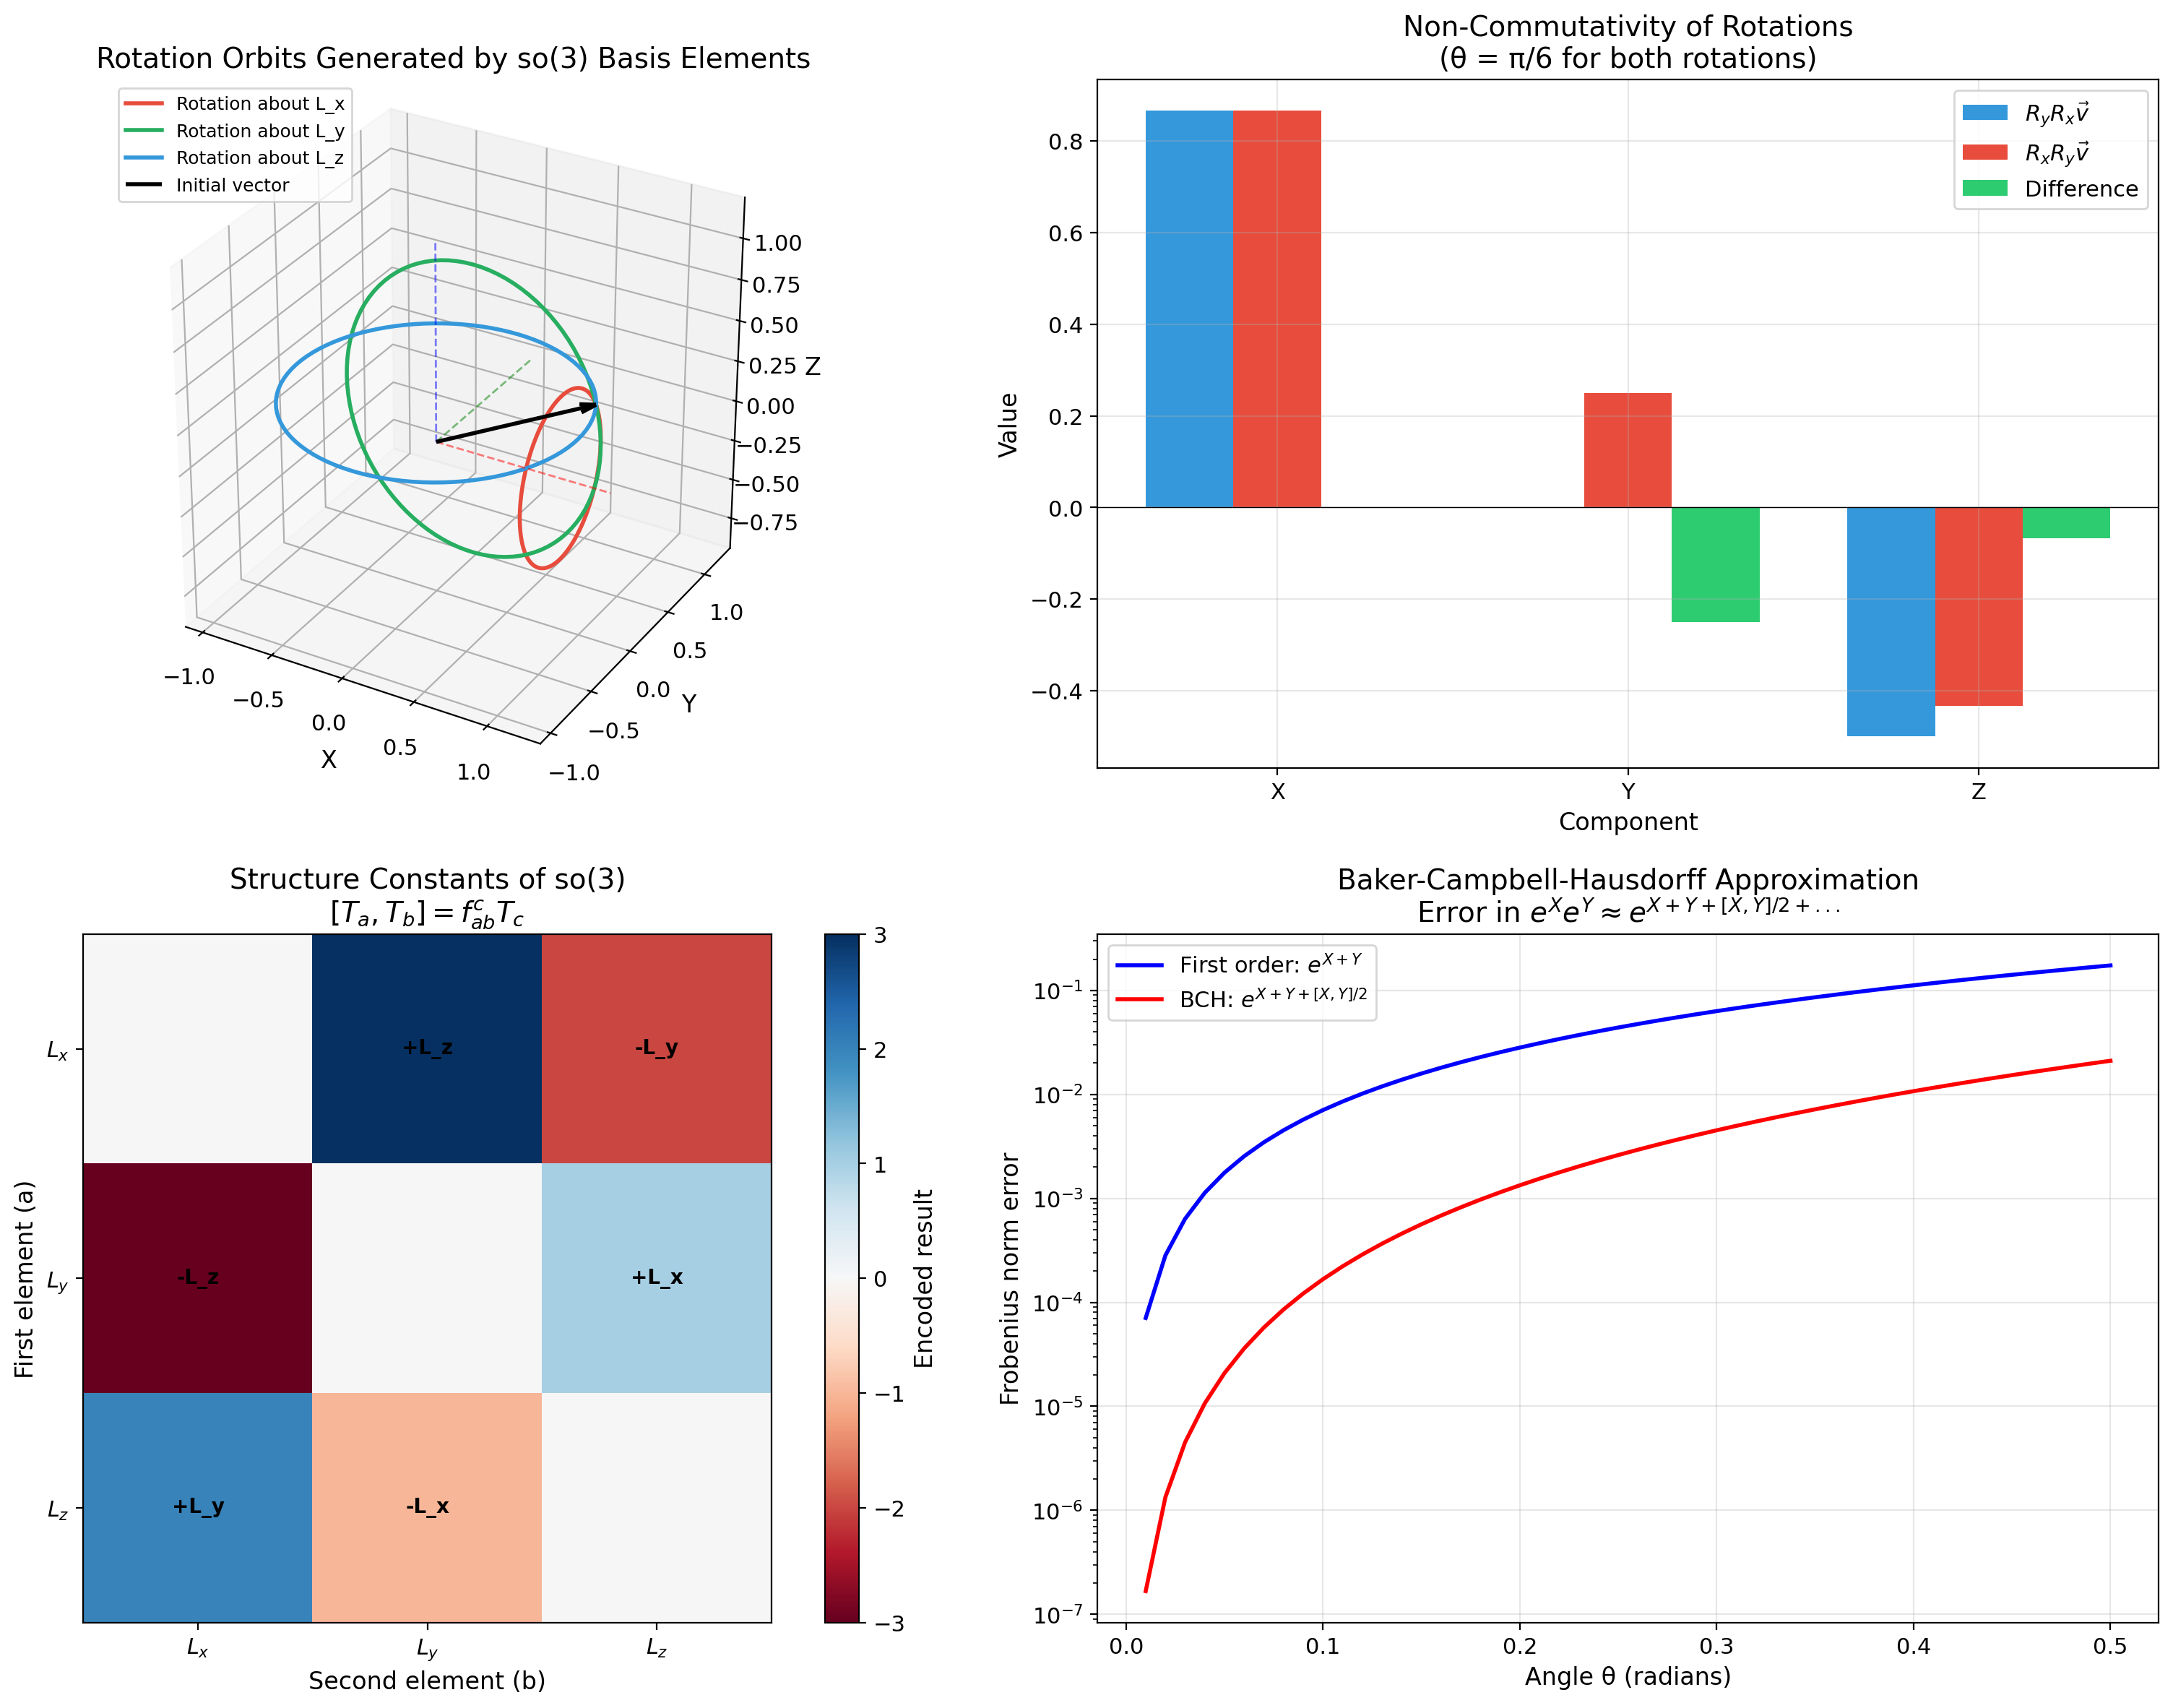


Plot saved to 'plot.png'


In [9]:
# Create a comprehensive visualization
fig = plt.figure(figsize=(16, 12))

# Subplot 1: Rotation orbits in 3D
ax1 = fig.add_subplot(2, 2, 1, projection='3d')

# Initial vector
v0 = np.array([1, 0.5, 0.3])
v0 = v0 / np.linalg.norm(v0)  # Normalize

# Generate rotation orbits for each axis
angles = np.linspace(0, 2*np.pi, 100)
colors = ['#e74c3c', '#27ae60', '#3498db']  # Red, Green, Blue

for i, (name, L, color) in enumerate(zip(basis_names, so3_basis, colors)):
    orbit = np.array([rotation_from_so3(L, theta) @ v0 for theta in angles])
    ax1.plot(orbit[:, 0], orbit[:, 1], orbit[:, 2], 
             color=color, linewidth=2, label=f'Rotation about {name}')

# Plot initial vector
ax1.quiver(0, 0, 0, v0[0], v0[1], v0[2], color='black', 
           arrow_length_ratio=0.1, linewidth=2, label='Initial vector')

# Plot axes
for i, (c, l) in enumerate(zip(['r', 'g', 'b'], ['X', 'Y', 'Z'])):
    direction = np.zeros(3)
    direction[i] = 1.2
    ax1.plot([0, direction[0]], [0, direction[1]], [0, direction[2]], 
             c + '--', alpha=0.5, linewidth=1)

ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Rotation Orbits Generated by so(3) Basis Elements')
ax1.legend(loc='upper left', fontsize=9)
ax1.set_box_aspect([1,1,1])

# Subplot 2: Commutator visualization
ax2 = fig.add_subplot(2, 2, 2)

# Visualize the non-commutativity of rotations
theta = np.pi / 6  # 30 degrees

# Start with a vector
v = np.array([1, 0, 0])

# Two different orderings
R_x = rotation_from_so3(L_x, theta)
R_y = rotation_from_so3(L_y, theta)

# First X then Y
v_xy = R_y @ R_x @ v
# First Y then X
v_yx = R_x @ R_y @ v

# Difference indicates non-commutativity
diff = v_xy - v_yx

# Create bar chart showing components
x_pos = np.arange(3)
width = 0.25

bars1 = ax2.bar(x_pos - width, v_xy, width, label=r'$R_y R_x \vec{v}$', color='#3498db')
bars2 = ax2.bar(x_pos, v_yx, width, label=r'$R_x R_y \vec{v}$', color='#e74c3c')
bars3 = ax2.bar(x_pos + width, diff, width, label='Difference', color='#2ecc71')

ax2.set_xlabel('Component')
ax2.set_ylabel('Value')
ax2.set_title('Non-Commutativity of Rotations\n(θ = π/6 for both rotations)')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['X', 'Y', 'Z'])
ax2.legend()
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
ax2.grid(True, alpha=0.3)

# Subplot 3: Structure constants visualization
ax3 = fig.add_subplot(2, 2, 3)

# Reshape structure constants for visualization
f_matrix = np.zeros((3, 3))
for a in range(3):
    for b in range(3):
        # Find non-zero c
        for c in range(3):
            if abs(f_so3[a, b, c]) > 0.5:
                f_matrix[a, b] = f_so3[a, b, c] * (c + 1)  # Encode which c

im = ax3.imshow(f_so3[:,:,0] + 2*f_so3[:,:,1] + 3*f_so3[:,:,2], 
                cmap='RdBu', vmin=-3, vmax=3)
ax3.set_xticks([0, 1, 2])
ax3.set_yticks([0, 1, 2])
ax3.set_xticklabels(['$L_x$', '$L_y$', '$L_z$'])
ax3.set_yticklabels(['$L_x$', '$L_y$', '$L_z$'])
ax3.set_xlabel('Second element (b)')
ax3.set_ylabel('First element (a)')
ax3.set_title('Structure Constants of so(3)\n$[T_a, T_b] = f_{ab}^c T_c$')

# Add text annotations
for a in range(3):
    for b in range(3):
        for c in range(3):
            if abs(f_so3[a, b, c]) > 0.5:
                sign = '+' if f_so3[a, b, c] > 0 else '-'
                text = f'{sign}{basis_names[c]}'
                ax3.text(b, a, text, ha='center', va='center', fontsize=10, fontweight='bold')

plt.colorbar(im, ax=ax3, label='Encoded result')

# Subplot 4: Baker-Campbell-Hausdorff approximation
ax4 = fig.add_subplot(2, 2, 4)

# BCH formula: exp(X)exp(Y) ≈ exp(X + Y + [X,Y]/2 + ...)
# Let's verify for small angles

angles_test = np.linspace(0.01, 0.5, 50)
errors_first_order = []
errors_bch = []

for theta in angles_test:
    X = theta * L_x
    Y = theta * L_y
    
    # Exact: exp(X) exp(Y)
    exact = expm(X) @ expm(Y)
    
    # First order: exp(X + Y)
    first_order = expm(X + Y)
    
    # BCH second order: exp(X + Y + [X,Y]/2)
    bch_second = expm(X + Y + 0.5 * lie_bracket(X, Y))
    
    errors_first_order.append(np.linalg.norm(exact - first_order, 'fro'))
    errors_bch.append(np.linalg.norm(exact - bch_second, 'fro'))

ax4.semilogy(angles_test, errors_first_order, 'b-', linewidth=2, 
             label=r'First order: $e^{X+Y}$')
ax4.semilogy(angles_test, errors_bch, 'r-', linewidth=2,
             label=r'BCH: $e^{X+Y+[X,Y]/2}$')
ax4.set_xlabel('Angle θ (radians)')
ax4.set_ylabel('Frobenius norm error')
ax4.set_title('Baker-Campbell-Hausdorff Approximation\n' + 
              r'Error in $e^X e^Y \approx e^{X+Y+[X,Y]/2+...}$')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lie_algebras_basics_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## 5. The Killing Form and Semisimplicity

### 5.1 The Killing Form

The **Killing form** is a symmetric bilinear form on a Lie algebra $\mathfrak{g}$ defined by:

$$B(X, Y) = \text{tr}(\text{ad}_X \circ \text{ad}_Y)$$

where $\text{ad}_X: \mathfrak{g} \to \mathfrak{g}$ is the **adjoint representation** defined by:

$$\text{ad}_X(Y) = [X, Y]$$

A Lie algebra is **semisimple** if and only if its Killing form is non-degenerate.

In [10]:
def adjoint_representation(X, basis):
    """
    Compute the matrix of the adjoint representation ad_X in the given basis.
    
    Parameters:
    -----------
    X : ndarray
        Element of the Lie algebra
    basis : list of ndarray
        Basis of the Lie algebra
    
    Returns:
    --------
    ndarray : Matrix representation of ad_X
    """
    dim = len(basis)
    basis_flat = np.array([b.flatten() for b in basis]).T
    
    ad_X = np.zeros((dim, dim))
    for j, Y in enumerate(basis):
        bracket = lie_bracket(X, Y)
        coeffs, _, _, _ = np.linalg.lstsq(basis_flat, bracket.flatten(), rcond=None)
        ad_X[:, j] = coeffs
    
    return ad_X

def killing_form(X, Y, basis):
    """
    Compute the Killing form B(X, Y) = tr(ad_X ad_Y).
    """
    ad_X = adjoint_representation(X, basis)
    ad_Y = adjoint_representation(Y, basis)
    return np.trace(ad_X @ ad_Y)

def killing_form_matrix(basis):
    """
    Compute the Killing form matrix B_ij = B(T_i, T_j).
    """
    dim = len(basis)
    B = np.zeros((dim, dim))
    for i in range(dim):
        for j in range(dim):
            B[i, j] = killing_form(basis[i], basis[j], basis)
    return B

# Compute Killing form for so(3)
B_so3 = killing_form_matrix(so3_basis)

print("Killing Form Matrix for so(3)")
print("=" * 40)
print(B_so3)
print(f"\nDeterminant: {np.linalg.det(B_so3):.2f}")
print(f"\nso(3) is semisimple: {abs(np.linalg.det(B_so3)) > 1e-10}")

Killing Form Matrix for so(3)
[[-2.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -2.00000000e+00  1.57009246e-16]
 [ 0.00000000e+00  1.57009246e-16 -2.00000000e+00]]

Determinant: -8.00

so(3) is semisimple: True


The Killing form for $\mathfrak{so}(3)$ is proportional to the identity matrix (scaled by $-2$), which confirms that $\mathfrak{so}(3)$ is semisimple.

## 6. Summary and Physical Significance

### Key Results

1. **Lie algebras** provide the mathematical framework for describing continuous symmetries through their infinitesimal generators.

2. The **Lie bracket** $[X, Y] = XY - YX$ captures the non-commutativity of symmetry operations.

3. The **Jacobi identity** ensures the consistency of nested commutators and is automatically satisfied for matrix Lie algebras.

4. **Structure constants** $f_{ab}^c$ completely characterize a Lie algebra and satisfy antisymmetry and the Jacobi identity.

5. The **exponential map** connects Lie algebras to their corresponding Lie groups, with $\mathfrak{so}(3) \to SO(3)$ providing rotation matrices.

6. The **Baker-Campbell-Hausdorff formula** shows how the Lie bracket contributes to the composition of exponentials.

7. The **Killing form** provides a criterion for semisimplicity and is fundamental in the classification of Lie algebras.

### Physical Applications

- **$\mathfrak{so}(3)$**: Angular momentum in classical and quantum mechanics
- **$\mathfrak{su}(2)$**: Spin in quantum mechanics, isospin in particle physics
- **$\mathfrak{su}(3)$**: Quantum chromodynamics (QCD), the strong nuclear force
- **Poincaré algebra**: Special relativity and quantum field theory

### References

1. Hall, B. C. (2015). *Lie Groups, Lie Algebras, and Representations*. Springer.
2. Humphreys, J. E. (1972). *Introduction to Lie Algebras and Representation Theory*. Springer.
3. Fulton, W., & Harris, J. (1991). *Representation Theory: A First Course*. Springer.